# **OpenQASM3.0 to qiskit.QuantumCircuit interpreter**
This program converts OpenQASM3 code to Qiskit QuantumCircuit Object for QOSF Cohort 4 Task 3. <br>
This does not capture the vastness of the OPENQASM 3.0 standard which itself is in development. <br>
It can perform operations for X, Y, Z, RX, RY, RZ, H, S, S†, T, T†, CX, CCX, SWAP & CSWAP gates <br>
and can initialise and pass variables as arguments to gates. It cannot make new gates and cannot check for errors as of now.

In [1]:
from QASM3_interpreter import QASM3toQCirc

First we check if the program works at all. In the next cell we test it for a QASM string input.<br>
Note the handling of different syntax in lines 5 and 6 of the following block.

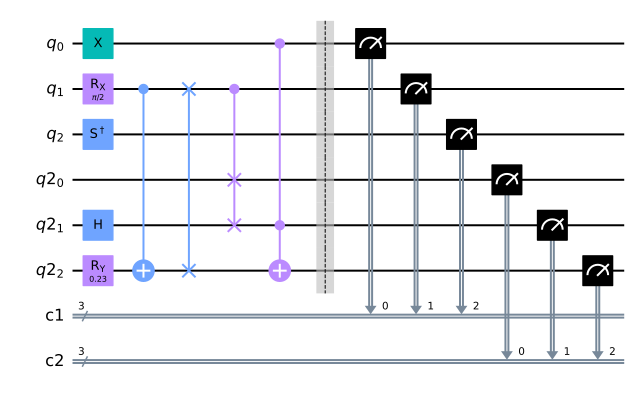

In [2]:
qstr = '''
OPENQASM 3.0;
include "stdgates.inc";

qreg q[3] q2[3];
creg[3] c1, c2;

const theta = pi/2;
float lambda = 0.23;

x q[0];
rx(theta) q[1];
ry(lambda) q2[2];
h q2[1];
cx q[1], q2[2];
sdg q[2];
swap q[1], q2[2];
cswap q[1], q2[0], q2[1];
ccx q[0], q2[1], q2[2];

barrier q;
barrier q2;
measure q -> c1;
measure q2 -> c2;
'''.strip()

interpreter = QASM3toQCirc(str_exp=qstr)
qc = interpreter.get_qcirc()
qc.draw('mpl')

Since the previous circuit is properly made, we go onto the next step and verify if it makes the inverse of the provided circuit properly.

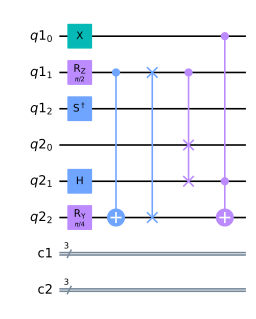

In [3]:
qstr = '''
OPENQASM 3.0;
include "stdgates.inc";

qreg[3] q1, q2;
creg[3] c1, c2;

const theta = pi/2;
float lambda = pi/4;

x q1[0];
rz(theta) q1[1];
ry(lambda) q2[2];
h q2[1];
cx q1[1], q2[2];
sdg q1[2];
swap q1[1], q2[2];
cswap q1[1], q2[0], q2[1];
ccx q1[0], q2[1], q2[2];

'''.strip()
interpreter = QASM3toQCirc(str_exp=qstr)
qc = interpreter.get_qcirc()
qc.draw('mpl',scale=0.8)

### Now we get the inverse of the above circuit.

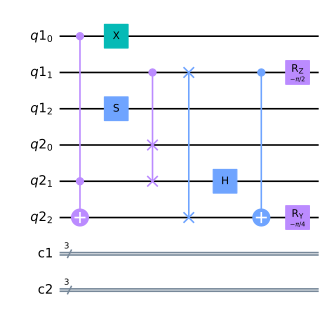

In [4]:
interpreter = QASM3toQCirc(str_exp=qstr)
qcrev = interpreter.get_inv_qcirc()
qcrev.draw('mpl',scale=0.8)

### Next we try for standard programs as inputs in the form of files.

We start with the GHZ circuit whose code is given below:

```
    OPENQASM 3.0;
    include "stdgates1.inc";
    qreg[3] q;
    creg c[3];
    reset q;
    h q[0];
    cx q[0],q[1];
    cx q[0],q[2];
```
This file was saved by the name `GHZ.qasm`.
<br> The cluster states are used in quantum dense coding.

0 ['reset', 'q']
1 ['h', 'q', '0']
2 ['cx', 'q', '0', 'q', '1']
3 ['cx', 'q', '0', 'q', '2']


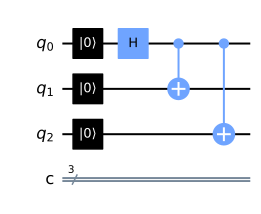

In [5]:
interpreter = QASM3toQCirc(prog_file='GHZ.qasm')
qc = interpreter.get_qcirc(debug=True)    #debug = True to show the gates being added in order
qc.draw('mpl')

0 ['cx', 'q', '0', 'q', '2']
1 ['cx', 'q', '0', 'q', '1']
2 ['h', 'q', '0']
3 ['reset', 'q']


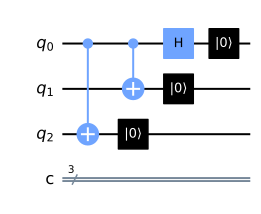

In [6]:
interpreter = QASM3toQCirc(prog_file='GHZ.qasm')
qcrev = interpreter.get_inv_qcirc(True)
qcrev.draw('mpl')

Next we get the circuit definition for `Brown State` circuit from `Brown state.qasm`. <br>
Brown states have important applications in teleportation and quantum information splitting. 

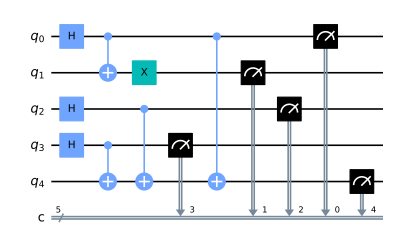

In [7]:
interpreter = QASM3toQCirc(prog_file='Brown State.qasm')
qc = interpreter.get_qcirc()
qc.draw('mpl',scale=0.8)

Finally we use the circuit for `w_state` which was saved in the file `w_state.qasm`. <br>
The `w_state` is an entangled state of n qubits which is remarkable for representing a type of multi-partite entanglement and is used in several applications in quantum information theory.  

```
OPENQASM 3.0;
include "stdgates.inc";
qreg q0[3];
creg c0[3];
x q0[2];
ry(-0.955316618124509) q0[1];
cz q0[2],q0[1];
ry(0.955316618124509) q0[1];
ry(-0.785398163397448) q0[0];
cz q0[1],q0[0];
ry(0.785398163397448) q0[0];
cx q0[1],q0[2];
cx q0[0],q0[1];
measure q0 -> c0;
```

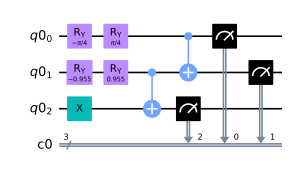

In [8]:
qasm_str = '''OPENQASM 3.0;
include "stdgates.inc";
qreg q0[3];
creg c0[3];
x q0[2];
ry(-0.955316618124509) q0[1];
cz q0[2],q0[1];
ry(0.955316618124509) q0[1];
ry(-0.785398163397448) q0[0];
cz q0[1],q0[0];
ry(0.785398163397448) q0[0];
cx q0[1],q0[2];
cx q0[0],q0[1];
measure q0 -> c0;'''.strip()
interpreter = QASM3toQCirc(str_exp=qasm_str) # with the measurements
qc = interpreter.get_qcirc()
qc.draw('mpl',scale = 0.8)

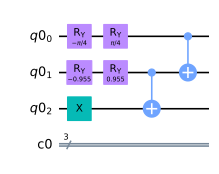

In [9]:
interpreter = QASM3toQCirc(prog_file='w_state.qasm') # without the measurements
qc = interpreter.get_qcirc()
qc.draw('mpl',scale = 0.8)

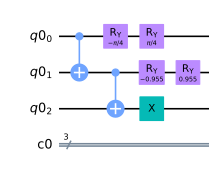

In [10]:
interpreter = QASM3toQCirc(prog_file='w_state.qasm')
qcrev = interpreter.get_inv_qcirc()
qcrev.draw('mpl',scale=0.8)

Thus, the interpreter works as intended.